# Simple Regression Model

1. Linear Reg. is supervised ML algo. that shares its working with statistics.
2. It has to have a Linear relatioship btw the Predictor and Target variable.
3. Regression helps in predicting the values like Sales, Cost, Time, etc
4. It works on the concept of the straight line equation which is y = mx + c

In [4]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scipystats
import statsmodels.api as sm
import pylab

In [5]:
# importing MTCARS dataset from R

mtcars=sm.datasets.get_rdataset("mtcars").data

In [6]:
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


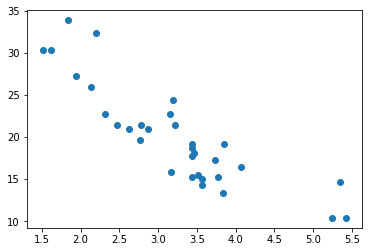

In [7]:
# to create a simple linear model with target variable = "mpg" and predictor  = "weight"

plt.scatter(x="wt",y="mpg",data=mtcars)

In [8]:
mtcars.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,32.0,20.090625,6.026948,10.400,15.42500,19.200,22.80,33.900
cyl,32.0,6.187500,1.785922,4.000,4.00000,6.000,8.00,8.000
disp,32.0,230.721875,123.938694,71.100,120.82500,196.300,326.00,472.000
hp,32.0,146.687500,68.562868,52.000,96.50000,123.000,180.00,335.000
drat,32.0,3.596563,0.534679,2.760,3.08000,3.695,3.92,4.930
wt,32.0,3.217250,0.978457,1.513,2.58125,3.325,3.61,5.424
qsec,32.0,17.848750,1.786943,14.500,16.89250,17.710,18.90,22.900
vs,32.0,0.437500,0.504016,0.000,0.00000,0.000,1.00,1.000
am,32.0,0.406250,0.498991,0.000,0.00000,0.000,1.00,1.000
gear,32.0,3.687500,0.737804,3.000,3.00000,4.000,4.00,5.000


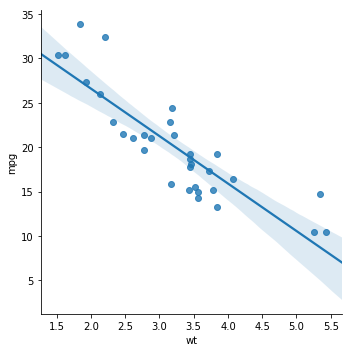

In [9]:
sns.lmplot(x="wt",y="mpg",data=mtcars)

In [10]:
# splitting data in train and test
from sklearn.model_selection import train_test_split
x=mtcars["wt"]
y=mtcars["mpg"]

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=0)     # 0.30 or 30% is the size of test

In [11]:
xtrain.shape

(25,)

In [12]:
xtest.shape

(7,)

In [13]:
# Finding the slope

xmean=xtrain.mean()
ymean=ytrain.mean()
xibar=xtrain-xmean
yibar=ytrain-ymean

In [14]:
slope=sum((xibar*yibar))/sum(xibar**2)
slope

-6.219904735028411

In [15]:
# thus the linear eqn appears to be ( Y = -6.219 X + C )     # slope is neegative meaning inversely proportional

In [16]:
# Finding the Intercept (C)

intercept=ymean-slope*xmean
intercept

40.081104291713075

In [17]:
from sklearn.linear_model import LinearRegression

## initiate the machine 
lr=LinearRegression()

In [18]:
lr.fit(pd.DataFrame(xtrain),ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
# slope

lr.coef_

array([-6.21990474])

In [20]:
# intercept (C)

lr.intercept_

40.08110429171308

In [21]:
y_hat=lr.predict(pd.DataFrame(xtest))
y_hat

array([14.76609202, 18.71573153, 18.684632  , 25.65092531,  6.83571348,
        7.42660443, 20.36400628])

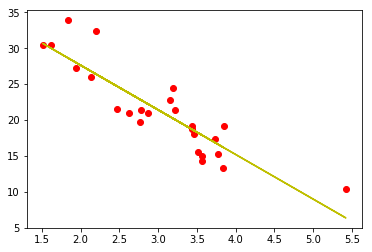

In [22]:
plt.scatter(xtrain,ytrain, c="r")
plt.plot(xtrain,lr.predict(pd.DataFrame(xtrain)),c="y")


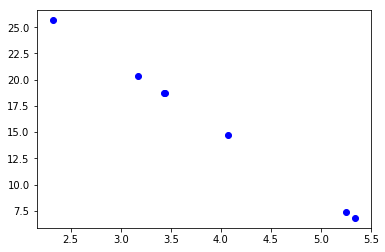

In [23]:
plt.scatter(xtest,y_hat,c="b")

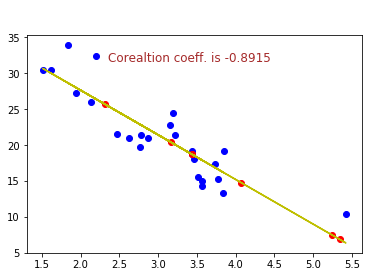

In [24]:
plt.scatter(xtrain,ytrain,c="b")
plt.scatter(xtest,y_hat,c="r")
plt.plot(xtrain,lr.predict(pd.DataFrame(xtrain)),c="y")
text="\n\n\nCorealtion coeff. is %1.4f" %np.corrcoef(xtrain,ytrain)[0,1]
plt.suptitle(text,color="brown")
plt.show()

# Multiple Linear Regression

In [25]:
x=mtcars.drop("mpg",axis=1)
y=mtcars.mpg

In [26]:
# fitting the model
lm=LinearRegression()

In [27]:
y_hat2=lm.fit(x,y).predict(x)

In [28]:
y_hat2

array([22.59950576, 22.11188608, 26.25064408, 21.23740455, 17.69343403,
       20.38303904, 14.38625625, 22.49601188, 24.4190899 , 18.69902994,
       19.19165439, 14.17216211, 15.5995736 , 15.7422247 , 12.03401342,
       10.93643771, 10.49362936, 27.77290581, 29.89673891, 29.5123691 ,
       23.64310344, 16.94305322, 17.7321815 , 13.30602198, 16.69167899,
       28.29346869, 26.15295396, 27.63627258, 18.8700408 , 19.69382815,
       13.94111838, 24.36826768])

In [29]:
# R square and RMSE

from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(mtcars.mpg,y_hat2))                        #R Square
print(np.sqrt(mean_squared_error(mtcars.mpg,y_hat2)))     #RMSE

0.8690157644777647
2.1469049671609435


# Statistical Report of the model

In [30]:
# here Endog refers to the Target variable and Exhog refers to Predictor Variables

# statmodels do not consider the constant C. therefore, i need to put C in my dataset

In [31]:
import statsmodels.formula.api as smf

In [32]:
# creating constant

x["Constant"]=1

In [33]:
x

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,Constant
Mazda RX4,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1
Mazda RX4 Wag,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1
Datsun 710,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1
Hornet 4 Drive,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1
Hornet Sportabout,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1
Valiant,6,225.0,105,2.76,3.460,20.22,1,0,3,1,1
Duster 360,8,360.0,245,3.21,3.570,15.84,0,0,3,4,1
Merc 240D,4,146.7,62,3.69,3.190,20.00,1,0,4,2,1
Merc 230,4,140.8,95,3.92,3.150,22.90,1,0,4,2,1
Merc 280,6,167.6,123,3.92,3.440,18.30,1,0,4,4,1


In [34]:
y

Mazda RX4              21.0
Mazda RX4 Wag          21.0
Datsun 710             22.8
Hornet 4 Drive         21.4
Hornet Sportabout      18.7
Valiant                18.1
Duster 360             14.3
Merc 240D              24.4
Merc 230               22.8
Merc 280               19.2
Merc 280C              17.8
Merc 450SE             16.4
Merc 450SL             17.3
Merc 450SLC            15.2
Cadillac Fleetwood     10.4
Lincoln Continental    10.4
Chrysler Imperial      14.7
Fiat 128               32.4
Honda Civic            30.4
Toyota Corolla         33.9
Toyota Corona          21.5
Dodge Challenger       15.5
AMC Javelin            15.2
Camaro Z28             13.3
Pontiac Firebird       19.2
Fiat X1-9              27.3
Porsche 914-2          26.0
Lotus Europa           30.4
Ford Pantera L         15.8
Ferrari Dino           19.7
Maserati Bora          15.0
Volvo 142E             21.4
Name: mpg, dtype: float64

In [157]:
model=smf.OLS(endog=y,exog=x).fit()

# here fit means create my linear regression model

In [158]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     17.45
Date:                Tue, 20 Aug 2019   Prob (F-statistic):           5.35e-08
Time:                        16:31:12   Log-Likelihood:                -73.469
No. Observations:                  32   AIC:                             162.9
Df Residuals:                      24   BIC:                             174.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hp            -0.0269      0.016     -1.645      0.113      -0.061       0.007
drat           1.4732      1.620      0.909      0.372      -1.871       4.818
qsec           0.0022      0.606      0.004      0.997      -1.248       1.252
vs             1.5135      1.926      0.786      0.440      -2.461       5.488
am             3.4295      2.011      1.705      0.101      -0.721       7.580
gear           1.4864      1.413      1.052      0.303      -1.430       4.402
carb          -1.1306      0.589     -1.920      0.067      -2.346       0.085
Constant      14.3479     13.934      1.030      0.313     -14.410      43.106
==============================================================================
Omnibus:                        0.076   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.963   Jarque-Bera (JB):                0.293
Skew:                          -0.009   Prob(JB):                        0.864
Kurtosis:                       2.531   Cond. No.                     4.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Backward Elimination - Feature Selection Process

### 1. Find out that feature which has the Max P value that is greater than 0.05 and drop them
### 2. keep doing it till get a feature with low P value

In [37]:
model=smf.OLS(endog=y,exog=x.drop(["cyl","vs","carb","gear","drat","hp"],axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     39.04
Date:                Tue, 20 Aug 2019   Prob (F-statistic):           7.47e-11
Time:                        10:34:10   Log-Likelihood:                -71.747
No. Observations:                  32   AIC:                             153.5
Df Residuals:                      27   BIC:                             160.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
disp           0.0077      0.011      0.730      0.472      -0.014       0.029
wt            -4.5883      1.167     -3.932      0.001      -6.982      -2.194
qsec           1.4170      0.391      3.619      0.001       0.614       2.220
am             3.3102      1.512      2.189      0.037       0.207       6.413
Constant       6.4424      8.257      0.780      0.442     -10.500      23.385
==============================================================================
Omnibus:                        2.319   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.314   Jarque-Bera (JB):                1.921
Skew:                           0.468   Prob(JB):                        0.383
Kurtosis:                       2.250   Cond. No.                     4.98e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Linear Regression Assumptions :

#### 1. Remove or convert Cat. Variables

#### 2. Generalisation of data is very important

#### 3. The residual plot should not show any pattern, if any pattern is found out then we cannot use Linear Regression 

#### 4. Normality : 

It is represented by quantile - quantile plot (QQ plot)

#### 5. Multicollinearity :

All the features in the data set should not be correlated with each other, meaning the predictor variables should not have high correlation , because the machine will not be able to understand which column/feature is explaining /supplying the most information to the model. To check we use VIF Test




In [38]:
residual = mtcars.mpg-y_hat2        # Actual - Predicted
residual

Mazda RX4             -1.599506
Mazda RX4 Wag         -1.111886
Datsun 710            -3.450644
Hornet 4 Drive         0.162595
Hornet Sportabout      1.006566
Valiant               -2.283039
Duster 360            -0.086256
Merc 240D              1.903988
Merc 230              -1.619090
Merc 280               0.500970
Merc 280C             -1.391654
Merc 450SE             2.227838
Merc 450SL             1.700426
Merc 450SLC           -0.542225
Cadillac Fleetwood    -1.634013
Lincoln Continental   -0.536438
Chrysler Imperial      4.206371
Fiat 128               4.627094
Honda Civic            0.503261
Toyota Corolla         4.387631
Toyota Corona         -2.143103
Dodge Challenger      -1.443053
AMC Javelin           -2.532181
Camaro Z28            -0.006022
Pontiac Firebird       2.508321
Fiat X1-9             -0.993469
Porsche 914-2         -0.152954
Lotus Europa           2.763727
Ford Pantera L        -3.070041
Ferrari Dino           0.006172
Maserati Bora          1.058882
Volvo 14

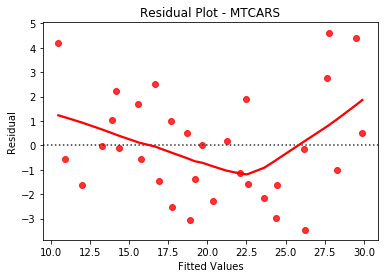

In [39]:
# X: fitted/predicted value, Y: Residual

sns.residplot(x=y_hat2,y=residual,color="r",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual Plot - MTCARS")
plt.show()

In [40]:
# no pattern can be seen

((array([-2.02511189, -1.62590278, -1.38593914, -1.20666642, -1.05953591,
         -0.93235918, -0.81872017, -0.71478609, -0.6180591 , -0.52680137,
         -0.43973827, -0.35589149, -0.27447843, -0.19484777, -0.11643566,
         -0.03873405,  0.03873405,  0.11643566,  0.19484777,  0.27447843,
          0.35589149,  0.43973827,  0.52680137,  0.6180591 ,  0.71478609,
          0.81872017,  0.93235918,  1.05953591,  1.20666642,  1.38593914,
          1.62590278,  2.02511189]),
  array([-3.45064408, -3.0700408 , -2.96826768, -2.5321815 , -2.28303904,
         -2.14310344, -1.63401342, -1.6190899 , -1.59950576, -1.44305322,
         -1.39165439, -1.11188608, -0.99346869, -0.5422247 , -0.53643771,
         -0.15295396, -0.08625625, -0.00602198,  0.00617185,  0.16259545,
          0.50097006,  0.50326109,  1.00656597,  1.05888162,  1.7004264 ,
          1.90398812,  2.22783789,  2.50832101,  2.76372742,  4.20637064,
          4.3876309 ,  4.62709419])),
 (2.224201809879941, -2.2572886496197

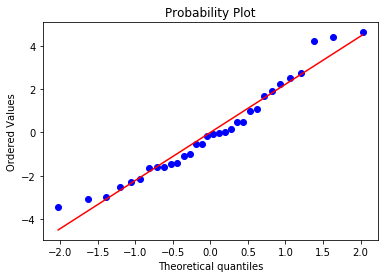

In [41]:
# Normality using QQ plot

scipystats.probplot(residual,plot=pylab)

In [ ]:
### Shapiro Wilk Test of Normality

H0 : Data/Residual is normal in nature
H1 : Data/Residual is not normal


In [43]:
from scipy.stats import shapiro

In [44]:
teststats, pvalue = shapiro(residual)

In [45]:
pvalue       # we fail to reject the null hyp.

0.2261517345905304

In [46]:
teststats

0.9569438099861145

In [47]:
from sklearn.datasets import load_boston

In [48]:
b = load_boston()

In [49]:
boston=pd.DataFrame(b.data, columns=b.feature_names)

In [50]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [51]:
print(b.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [52]:
boston["MEDV"]=pd.DataFrame(b.target)

In [53]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [54]:
x=boston.drop("MEDV",axis=1)
y=boston.MEDV
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=0)     # 0.30 or 30% is the size of test

In [55]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [56]:
lmm=LinearRegression()

In [57]:
y_hat3=lmm.fit(xtrain,ytrain).predict(xtest)

In [58]:
y_hat3

array([24.9357079 , 23.75163164, 29.32638296, 11.97534566, 21.37272478,
       19.19148525, 20.5717479 , 21.21154015, 19.04572003, 20.35463238,
        5.44119126, 16.93688709, 17.15482272,  5.3928209 , 40.20270696,
       32.31327348, 22.46213268, 36.50124666, 31.03737014, 23.17124551,
       24.74815321, 24.49939403, 20.6595791 , 30.4547583 , 22.32487164,
       10.18932894, 17.44286422, 18.26103077, 35.63299326, 20.81960303,
       18.27218007, 17.72047628, 19.33772473, 23.62254823, 28.97766856,
       19.45036239, 11.13170639, 24.81843595, 18.05294835, 15.59712226,
       26.21043403, 20.81140432, 22.17349382, 15.48367365, 22.62261604,
       24.88561528, 19.74754478, 23.0465628 ,  9.84579105, 24.36378793,
       21.47849008, 17.62118176, 24.39160873, 29.95102691, 13.57219422,
       21.53645439, 20.53306273, 15.03433182, 14.3232289 , 22.11929299,
       17.07321915, 21.54141094, 32.96766968, 31.371599  , 17.7860591 ,
       32.75069556, 18.74795323, 19.21428022, 19.41970047, 23.08

In [59]:
print(r2_score(ytest,y_hat3))                        #R Square


0.6733825506400175


In [60]:
print(np.sqrt(mean_squared_error(ytest,y_hat3)))     #RMSE

5.21497514537542


In [61]:
x["Constant"]=1

In [62]:
model2=smf.OLS(endog=y,exog=x).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 20 Aug 2019   Prob (F-statistic):          6.72e-135
Time:                        10:35:22   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
Constant      36.4595      5.103      7.144      0.000      26.432      46.487
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
model2=smf.OLS(endog=y,exog=x.drop("AGE",axis=1)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Tue, 20 Aug 2019   Prob (F-statistic):          6.08e-136
Time:                        10:35:22   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1080      0.033     -3.290      0.001      -0.173      -0.043
ZN             0.0463      0.014      3.404      0.001       0.020       0.073
INDUS          0.0206      0.061      0.335      0.738      -0.100       0.141
CHAS           2.6890      0.860      3.128      0.002       1.000       4.378
NOX          -17.7135      3.679     -4.814      0.000     -24.943     -10.484
RM             3.8144      0.408      9.338      0.000       3.012       4.617
DIS           -1.4786      0.191     -7.757      0.000      -1.853      -1.104
RAD            0.3058      0.066      4.627      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.283      0.001      -0.020      -0.005
PTRATIO       -0.9522      0.130     -7.308      0.000      -1.208      -0.696
B              0.0093      0.003      3.481      0.001       0.004       0.015
LSTAT         -0.5239      0.048    -10.999      0.000      -0.617      -0.430
Constant      36.4369      5.080      7.172      0.000      26.456      46.418
==============================================================================
Omnibus:                      178.343   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.386
Skew:                           1.523   Prob(JB):                    1.73e-171
Kurtosis:                       8.294   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
model2=smf.OLS(endog=y,exog=x.drop(["INDUS","AGE"],axis=1)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Tue, 20 Aug 2019   Prob (F-statistic):          5.54e-137
Time:                        10:35:22   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
Constant      36.3411      5.067      7.171      0.000      26.385      46.298
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Constant
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,1
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,1
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,1
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,1
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,1
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,1
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,1


In [66]:
residual2 = ytest-y_hat3        # Actual - Predicted
residual

Mazda RX4             -1.599506
Mazda RX4 Wag         -1.111886
Datsun 710            -3.450644
Hornet 4 Drive         0.162595
Hornet Sportabout      1.006566
Valiant               -2.283039
Duster 360            -0.086256
Merc 240D              1.903988
Merc 230              -1.619090
Merc 280               0.500970
Merc 280C             -1.391654
Merc 450SE             2.227838
Merc 450SL             1.700426
Merc 450SLC           -0.542225
Cadillac Fleetwood    -1.634013
Lincoln Continental   -0.536438
Chrysler Imperial      4.206371
Fiat 128               4.627094
Honda Civic            0.503261
Toyota Corolla         4.387631
Toyota Corona         -2.143103
Dodge Challenger      -1.443053
AMC Javelin           -2.532181
Camaro Z28            -0.006022
Pontiac Firebird       2.508321
Fiat X1-9             -0.993469
Porsche 914-2         -0.152954
Lotus Europa           2.763727
Ford Pantera L        -3.070041
Ferrari Dino           0.006172
Maserati Bora          1.058882
Volvo 14

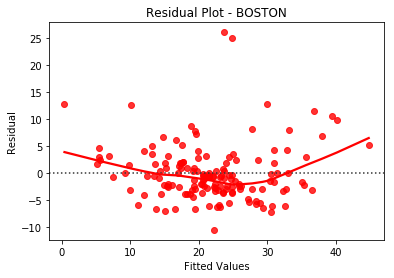

In [67]:
# X: fitted/predicted value, Y: Residual

sns.residplot(x=y_hat3,y=residual2,color="r",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual Plot - BOSTON")
plt.show()

((array([-2.60828957, -2.28890067, -2.10591774, -1.97438596, -1.87014095,
         -1.78297348, -1.7075655 , -1.64077866, -1.58059905, -1.52565375,
         -1.474963  , -1.42780197, -1.3836187 , -1.34198267, -1.30255131,
         -1.26504733, -1.22924293, -1.1949486 , -1.16200487, -1.1302762 ,
         -1.09964636, -1.07001489, -1.0412943 , -1.01340792, -0.98628816,
         -0.95987505, -0.93411519, -0.90896073, -0.88436868, -0.86030017,
         -0.83672   , -0.81359614, -0.79089936, -0.76860288, -0.74668211,
         -0.72511441, -0.70387886, -0.68295608, -0.6623281 , -0.64197819,
         -0.62189074, -0.60205115, -0.58244576, -0.56306175, -0.54388703,
         -0.52491024, -0.50612064, -0.48750805, -0.46906285, -0.45077588,
         -0.43263844, -0.41464222, -0.39677931, -0.37904213, -0.3614234 ,
         -0.34391617, -0.32651373, -0.30920962, -0.29199761, -0.27487168,
         -0.257826  , -0.2408549 , -0.22395291, -0.20711465, -0.19033491,
         -0.1736086 , -0.15693072, -0.

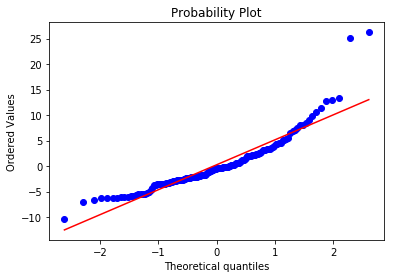

In [68]:
# Normality using QQ plot

scipystats.probplot(residual2,plot=pylab)

In [69]:

lml=LinearRegression()

In [70]:
y_hat4=lml.fit(x,y).predict(x)

In [71]:
residual3=y-y_hat4

In [72]:
residual3

0      -6.003843
1      -3.425562
2       4.132403
3       4.792964
4       8.256476
5       3.443716
6      -0.101808
7       7.564012
8       4.976363
9      -0.020262
10     -3.999497
11     -2.686796
12      0.793478
13      0.847097
14     -1.083482
15      0.602517
16      2.572490
17      0.588599
18      4.021989
19     -0.206136
20      1.076142
21      1.928963
22     -0.632881
23      0.693715
24     -0.078338
25      0.513314
26      1.136023
27      0.091526
28     -1.147373
29      0.123572
         ...    
476    -3.834816
477     0.457273
478    -4.604963
479    -0.462764
480    -0.468789
481    -3.398873
482    -3.569943
483     0.716012
484     1.144838
485    -1.022259
486    -0.555920
487    -0.725361
488     3.344163
489    -1.223867
490     4.436003
491    -0.159085
492     4.168815
493     1.173379
494     3.887506
495     6.214580
496     5.686792
497    -0.808541
498    -0.098052
499    -0.954988
500    -3.668708
501    -1.133341
502    -1.775719
503    -3.7274

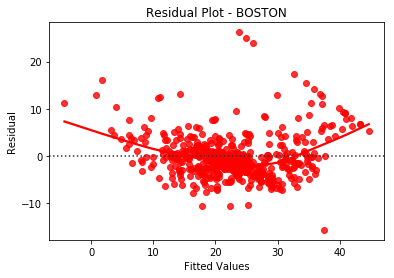

In [73]:
# X: fitted/predicted value, Y: Residual

sns.residplot(x=y_hat4,y=residual3,color="r",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual Plot - BOSTON")
plt.show()

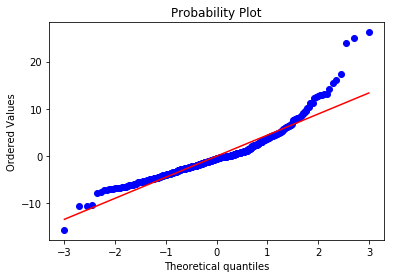

In [108]:
scipystats.probplot(residual3,plot=pylab)
plt.show()

# Understanding Errors

R^2 = 1-(SSE/SST)   
    
In ML first model is our average

In [111]:
np.mean(residual2)

0.2546520232077938

In [83]:
ybar=mtcars.mpg.mean()
xbar=mtcars.wt.mean()

In [84]:
# Applying Linear Regression

In [87]:
hitman=LinearRegression()
hitman.fit(pd.DataFrame(mtcars.wt),mtcars.mpg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [89]:
print(hitman.coef_)
print(hitman.intercept_)

[-5.34447157]
37.28512616734204


In [90]:
# Line Of Regression :    y = -5.34*X + 37.28

In [92]:
yhat = -5.34*mtcars.wt + 37.28
yhat

Mazda RX4              23.28920
Mazda RX4 Wag          21.92750
Datsun 710             24.89120
Hornet 4 Drive         20.11190
Hornet Sportabout      18.91040
Valiant                18.80360
Duster 360             18.21620
Merc 240D              20.24540
Merc 230               20.45900
Merc 280               18.91040
Merc 280C              18.91040
Merc 450SE             15.54620
Merc 450SL             17.36180
Merc 450SLC            17.09480
Cadillac Fleetwood      9.24500
Lincoln Continental     8.31584
Chrysler Imperial       8.73770
Fiat 128               25.53200
Honda Civic            28.65590
Toyota Corolla         27.48110
Toyota Corona          24.11690
Dodge Challenger       18.48320
AMC Javelin            18.93710
Camaro Z28             16.77440
Pontiac Firebird       16.74770
Fiat X1-9              26.94710
Porsche 914-2          25.85240
Lotus Europa           29.20058
Ford Pantera L         20.35220
Ferrari Dino           22.48820
Maserati Bora          18.21620
Volvo 14

In [93]:
sse = sum((mtcars.mpg-yhat)**2)

In [94]:
sse                     # Sum Of Square Errors

278.325274892

SSE is the measure of how the actual values are getting clustered around the predicted values where as the SST is how Actual Values are in Sync with Average Value (ybar)

In [96]:
sst = sum((mtcars.mpg-ybar)**2)

In [97]:
sst                    # Sum of Square Total

1126.0471875

In [98]:
ssr = sum((yhat-ybar)**2)

In [99]:
ssr                    # Sum of Square Regression

846.3100503919999

In LR statement " lower the VARIANCE means lower the ERROR "

In [100]:
# calculating R Square

rsq = 1-(sse/sst)

rsq

0.7528298298849043

RMSE = underoot (SSE/(n-2))       ,      n = no. of rows

Adjusted R square 

            Adj. R Sqr = 1 - [((1-Rsq)(N-1))/(N-P-1)]
            
            N : Length of Data
            p : No. of Independent Features

In [107]:
adj_R_sqr = 1 - (((1-rsq)*(len(mtcars)-1))/(len(mtcars)-1-1))

adj_R_sqr

0.7445908242144011

# Multi collinearity check

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [115]:
mtcars["Constant"]=1

In [117]:
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,Constant
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1


In [122]:
vif=[variance_inflation_factor(mtcars.values,i) for i in range (mtcars.shape[1])]

In [125]:
pd.DataFrame({"vif":vif[0:]},index=mtcars.columns).T

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,Constant
vif,7.634507,15.382159,22.19436,10.287988,3.411846,17.942416,7.980373,4.971265,4.98088,5.406599,7.930553,1629.114518


In [126]:
# drop all columns that have vif greater than 10

In [128]:
mtcars1=mtcars.drop(["cyl","disp","wt"],axis=1)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,Constant
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,1
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,1
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,1
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,1


In [130]:
x=mtcars1.drop("mpg",axis=1)
y=mtcars1.mpg

In [132]:
jango=LinearRegression()

In [133]:
jango.fit(x,y).predict(x)

array([22.01896164, 22.02017458, 27.31306298, 20.80662056, 16.50959283,
       20.4715706 , 12.44875301, 23.35528193, 22.81149973, 19.7861846 ,
       19.78748417, 15.12731133, 15.12774452, 15.12861091, 13.11834607,
       12.95176004, 12.88568318, 28.38103889, 28.87773262, 28.61515313,
       22.07140454, 16.6081308 , 17.18360624, 13.21388043, 16.40653451,
       28.3798043 , 27.05962659, 27.00863967, 19.82437959, 19.07882433,
       12.38807938, 26.13452229])

In [134]:
model4=smf.OLS(endog=y,exog=x).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     17.45
Date:                Tue, 20 Aug 2019   Prob (F-statistic):           5.35e-08
Time:                        14:56:19   Log-Likelihood:                -73.469
No. Observations:                  32   AIC:                             162.9
Df Residuals:                      24   BIC:                             174.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hp            -0.0269      0.016     -1.645      0.113      -0.061       0.007
drat           1.4732      1.620      0.909      0.372      -1.871       4.818
qsec           0.0022      0.606      0.004      0.997      -1.248       1.252
vs             1.5135      1.926      0.786      0.440      -2.461       5.488
am             3.4295      2.011      1.705      0.101      -0.721       7.580
gear           1.4864      1.413      1.052      0.303      -1.430       4.402
carb          -1.1306      0.589     -1.920      0.067      -2.346       0.085
Constant      14.3479     13.934      1.030      0.313     -14.410      43.106
==============================================================================
Omnibus:                        0.076   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.963   Jarque-Bera (JB):                0.293
Skew:                          -0.009   Prob(JB):                        0.864
Kurtosis:                       2.531   Cond. No.                     4.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [136]:
mtcars.values.shape

(32, 12)

# Heteroscedasticity Test

In [139]:
import statsmodels.stats.api as sms

In [ ]:
H0 : residual are not heteroscedastic in nature
H1 : residual are heteroscedastic in nature

In [141]:
sms.het_goldfeldquandt(residual, mtcars.drop("mpg",axis=1))

(28.86399304088992, 0.0010748981447214702, 'increasing')

In [ ]:
above results are tstats , pvalue and direction of heteroscedastic

here null hyp is rejected as p value is less than 0.05

# Auto Correlation in Errors

The Errors should not be auto corrected in nature as it will violate the assumptions of the Linear Regression Model

## Durbin Watson Test

In case of Durbin Watson test id tstats value = 2 : No correlation of errors

if tstats lies btw 0<2 and >2 : correlation is present   first +ive second case -ive

In [145]:
sms.durbin_watson(residual)

1.860893368454809

## Linearity - Rainbow Test

The data should be Linear in nature as in Residuals Linearity along with Predictor's Linearity is preffered

In [159]:
import statsmodels.api as sma
sma.stats.diagnostic.linear_rainbow(model)

(2.884337818284375, 0.06625925976219946)

## Summary of Assumptions on MTCARS Dataset

1. Data appears to be linear in nature as the Rainbow Test P value is 0.06

2. There was no trend observed in residual plot which meets the assumption of LR model

3. In Normality test, we saw that the Shapiro - Wilk test gives me a Pvalue of 0.226 which means we fail to reject the null hyp. that states residulas are NORMAL

4. In VIF test, we saw that there are couple of variables for whom the VIF value was more than 10 indicating those variables are vulnerable in predicting the LR model and hence, Regression is not the best bet here.

5. In Heteroscedasticity, we realized that GoldfendQuandt Test gives a Pvalue if 0.00107 which strongly indicates that errors/data i9s heteroscedaticity and therefore we cannot deploy LR model.

6. Durbin Watson Test of Correlation of Error and thus, LR is not the correct model for the MTCARS Dataset.
